In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_file = '../data/all_trades_at_5_buy_next_month.pkl'
price_data_file = '../data/merged_price_instit_data.pkl'

df = pd.read_pickle(data_file)
price_df = pd.read_pickle(price_data_file)

In [6]:
display(df)

,start_date,institutional_ownership,permno,cusip,return_30,30-end,return_90,90-end,return_180,180-end,alpha_30,alpha_90,alpha_180,institutional_ownership_bin
0,2019-02-01,0.291140,14945,00030710,0.040983,2019-03-04 00:00:00,-0.336064,2019-05-02 00:00:00,-0.597131,2019-07-31 00:00:00,-0.048627,-0.384616,-0.621009,20-40%
1,2008-12-01,0.503035,90825,00081T10,2.631581,2008-12-31 00:00:00,0.599998,2009-03-02 00:00:00,2.610544,2009-06-01 00:00:00,2.178656,0.882505,2.266139,40-60%
2,2010-07-01,0.488968,90825,00081T10,0.238748,2010-08-02 00:00:00,0.144812,2010-09-29 00:00:00,0.704499,2010-12-28 00:00:00,0.181233,0.144100,0.342840,40-60%
3,2011-11-01,0.637308,90825,00081T10,0.428353,2011-12-01 00:00:00,0.608632,2012-01-30 00:00:00,0.625583,2012-04-30 00:00:00,0.407333,0.406147,0.452294,60-80%
4,2020-04-01,0.747115,90825,00081T10,0.515992,2020-05-01 00:00:00,0.530018,2020-06-30 00:00:00,0.324989,2020-09-28 00:00:00,0.244177,0.065435,-0.055570,60-80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,2016-02-01,0.422057,81784,Y8564W10,0.180351,2016-03-02 00:00:00,0.564563,2016-05-02 00:00:00,-0.158865,2016-08-01 00:00:00,0.131970,0.384036,-0.293787,40-60%
7640,2019-02-01,0.141747,81784,Y8564W10,0.144068,2019-03-04 00:00:00,0.220340,2019-05-02 00:00:00,0.288139,2019-07-31 00:00:00,0.087857,0.117542,0.173171,0-20%
7641,2020-04-01,0.140701,81784,Y8564W10,0.165562,2020-05-01 00:00:00,-0.205297,2020-06-30 00:00:00,-0.278144,2020-09-28 00:00:00,-0.089378,-0.468178,-0.565120,0-20%
7642,2016-02-01,0.405488,91656,Y8565J10,-0.079569,2016-03-02 00:00:00,0.420558,2016-05-02 00:00:00,0.280088,2016-08-01 00:00:00,-0.105227,0.292213,0.111880,40-60%


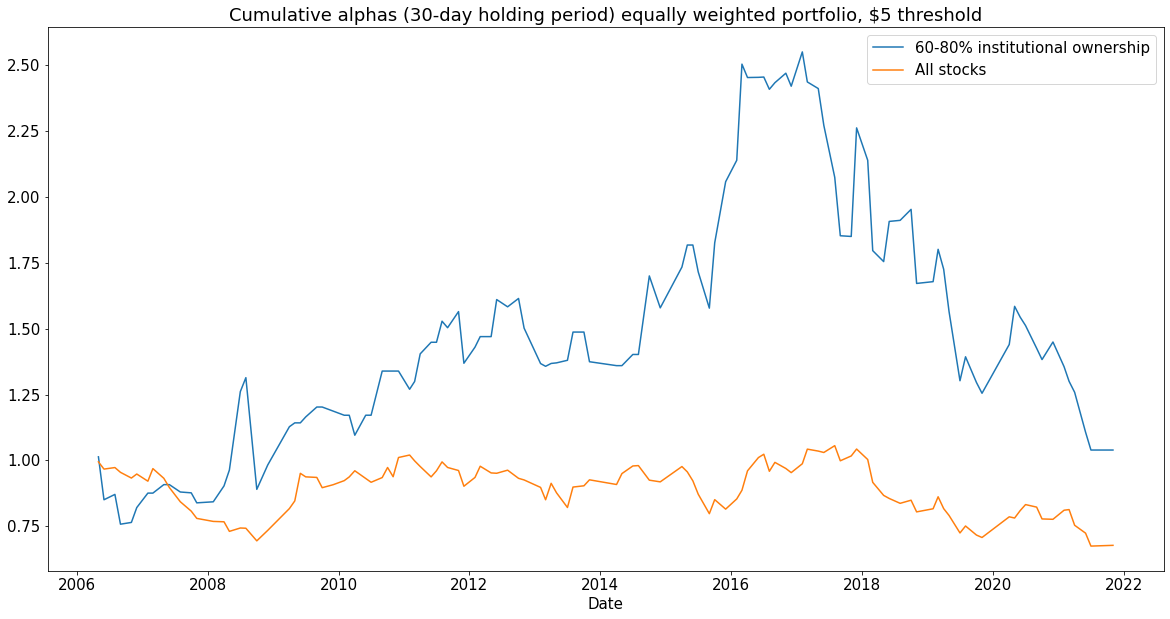

In [55]:
# Group by start_date
df_grouped = df.groupby('start_date')

returns = []
dates = []

for name, group in df_grouped:
    group = group[group['institutional_ownership_bin'] == '60-80%']


    ret = group['alpha_30'].mean()

    if(len(group) < 5):
        ret = 0
        for i in range(0, len(group)):
            this_ret = 0.2 * group.iloc[i]['alpha_30']
            if(np.isnan(this_ret)):
                this_ret = 0
            ret += this_ret


    if(np.isnan(ret)):
        ret = 0
    returns.append(ret)
    dates.append(name)

cum_returns = np.cumprod(np.array(returns) + 1)

dates_2 = []
returns_2 = []
for name, group in df_grouped:
    # group = group[group['institutional_ownership_bin'] == '60-80%']


    ret = group['alpha_30'].mean()

    if(len(group) < 5):
        ret = 0
        for i in range(0, len(group)):
            this_ret = 0.2 * group.iloc[i]['alpha_30']
            if(np.isnan(this_ret)):
                this_ret = 0
            ret += this_ret


    if(np.isnan(ret)):
        ret = 0
    returns_2.append(ret)
    dates_2.append(name)

cum_returns_2 = np.cumprod(np.array(returns_2) + 1)
plt.figure(figsize=(20, 10))
plt.title('Cumulative alphas (30-day holding period) equally weighted portfolio, $5 threshold')
plt.xlabel('Date')
# Big font
plt.rc('font', size=15)
plt.plot(dates, cum_returns, label = '60-80% institutional ownership')
plt.plot(dates_2, cum_returns_2, label = 'All stocks')
plt.legend()
plt.show()



institutional_ownership_bin,0-20%,20-40%,40-60%,60-80%,80+
month_and_year,,,,,
2006-04,20,21,15,7,0
2006-05,15,17,13,8,1
2006-06,19,12,16,3,0
2006-07,4,7,6,2,0
2006-08,9,9,4,7,3
...,...,...,...,...,...
2021-04,25,12,3,3,0
2021-05,20,12,6,2,0
2021-06,23,6,2,4,1


institutional_ownership_bin,0-20%,20-40%,40-60%,60-80%,80+,30-day_0-20%,30-day_20-40%,30-day_40-60%,30-day_60-80%,30-day_80+
month_and_year,,,,,,,,,,
2006-04,20,21,15,7,0,NaN,NaN,NaN,NaN,NaN
2006-05,15,17,13,8,1,35.0,38.0,28.0,15.0,1.0
2006-06,19,12,16,3,0,34.0,29.0,29.0,11.0,1.0
2006-07,4,7,6,2,0,23.0,19.0,22.0,5.0,0.0
2006-08,9,9,4,7,3,13.0,16.0,10.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2021-04,25,12,3,3,0,54.0,24.0,16.0,6.0,2.0
2021-05,20,12,6,2,0,45.0,24.0,9.0,5.0,0.0
2021-06,23,6,2,4,1,43.0,18.0,8.0,6.0,1.0


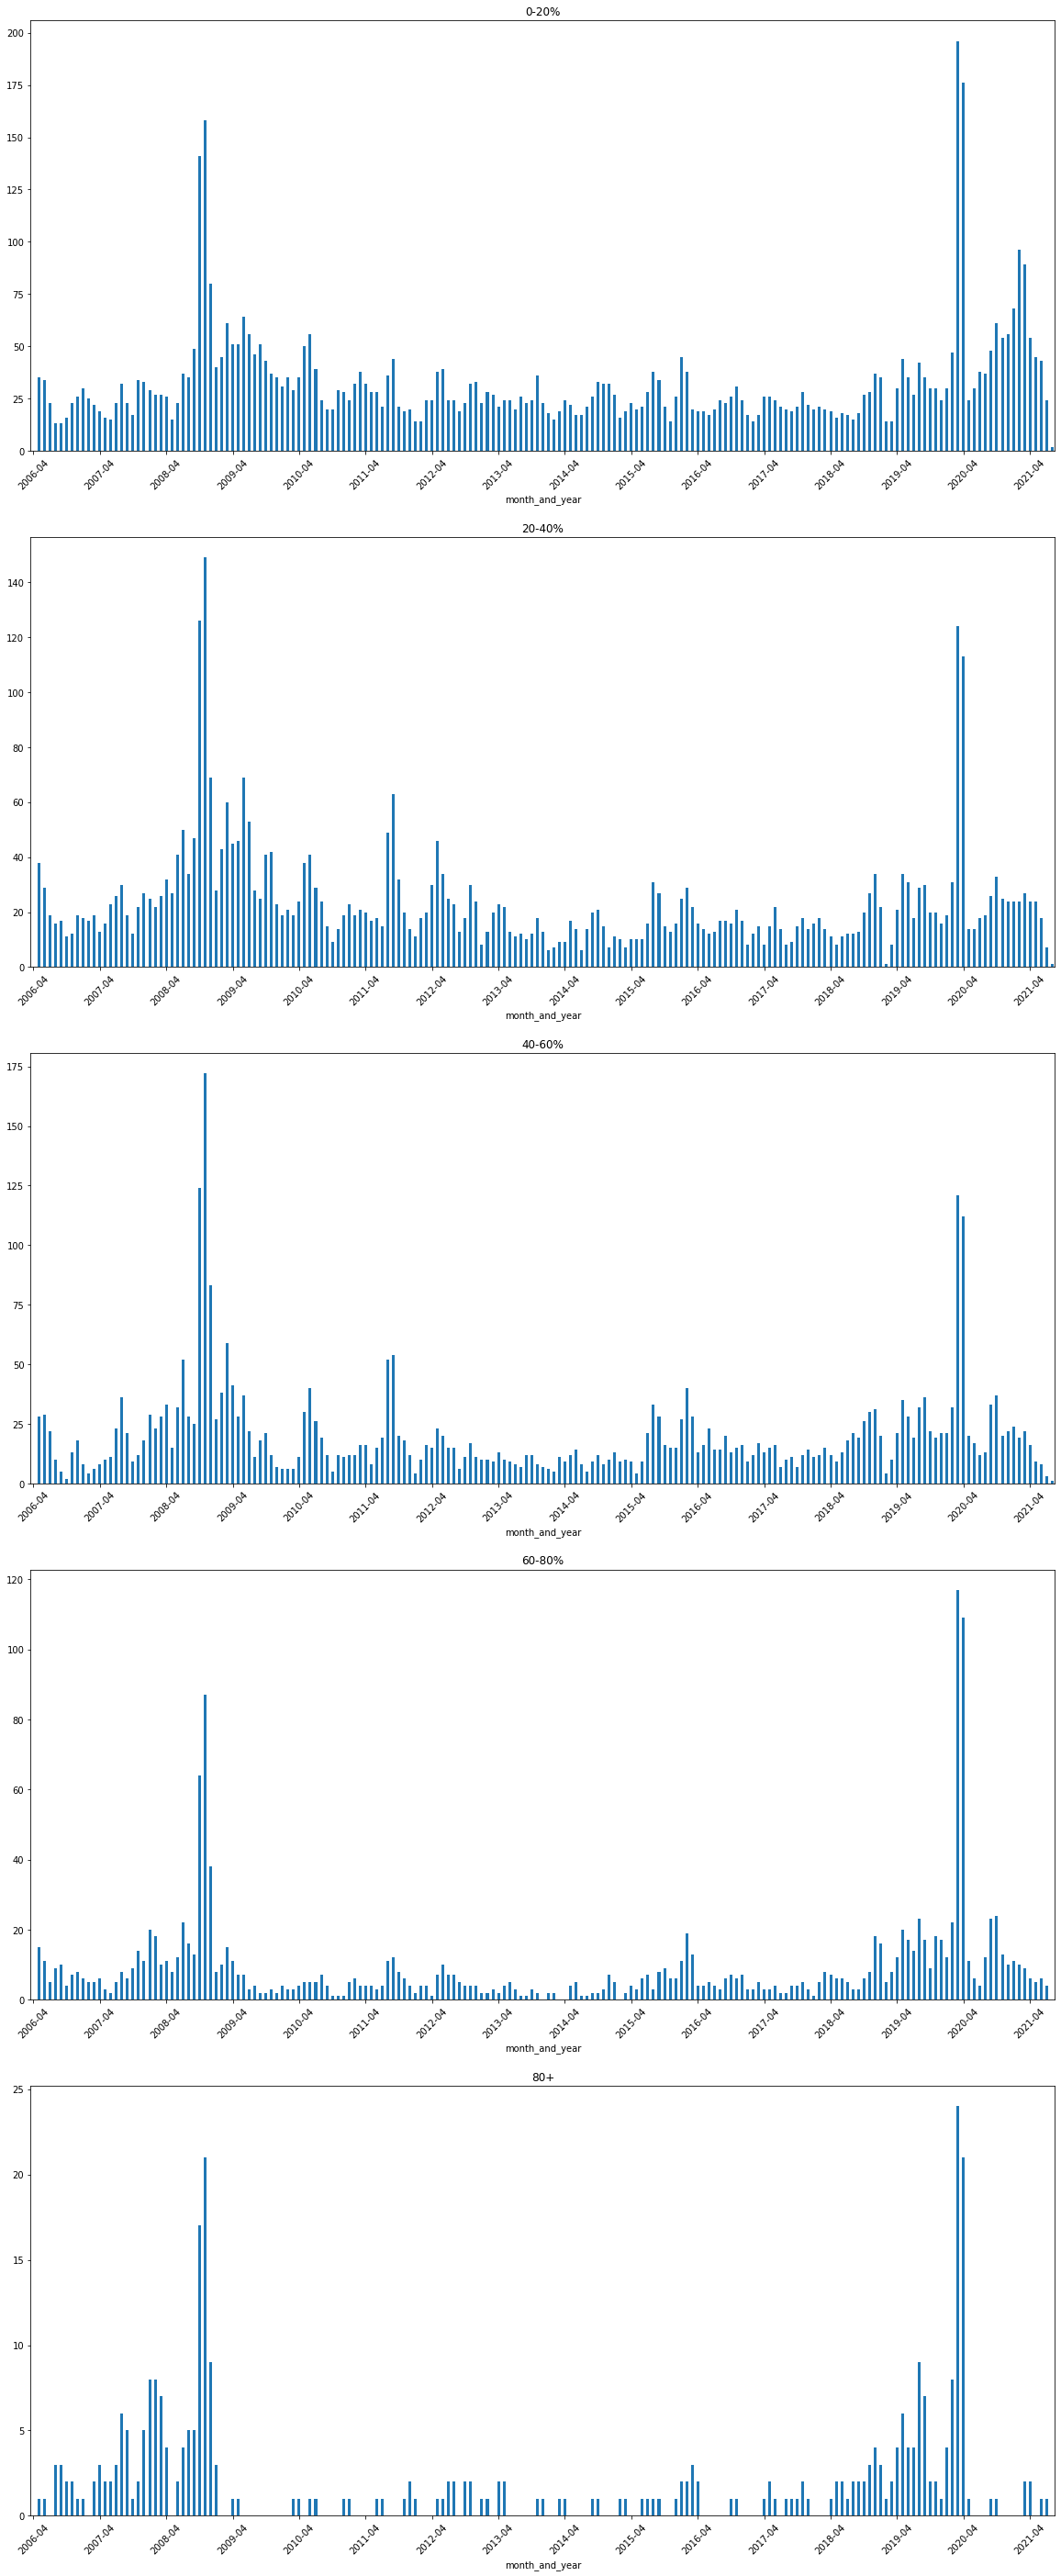

In [40]:
# Make a new column called month and year
df['month_and_year'] = df['start_date'].dt.to_period('M')

# agg by bin and month_and_year
agg_by_bin_and_month = df.groupby(['institutional_ownership_bin', 'month_and_year'])['start_date'].count()
agg_by_bin_and_month = agg_by_bin_and_month.unstack(level = 0)

display(agg_by_bin_and_month)

agg_by_bin_and_month['30-day_0-20%'] = agg_by_bin_and_month['0-20%'] + agg_by_bin_and_month['0-20%'].shift(1)
agg_by_bin_and_month['30-day_20-40%'] = agg_by_bin_and_month['20-40%'] + agg_by_bin_and_month['20-40%'].shift(1)
agg_by_bin_and_month['30-day_40-60%'] = agg_by_bin_and_month['40-60%'] + agg_by_bin_and_month['40-60%'].shift(1)
agg_by_bin_and_month['30-day_60-80%'] = agg_by_bin_and_month['60-80%'] + agg_by_bin_and_month['60-80%'].shift(1)
agg_by_bin_and_month['30-day_80+'] = agg_by_bin_and_month['80+'] + agg_by_bin_and_month['80+'].shift(1)


# 5-plots for 30-day portfolios (num stocks on the x-axis)
fig, ax = plt.subplots(5, 1, figsize = (20, 50))
# convert index to datetime
# agg_by_bin_and_month.index = agg_by_bin_and_month.index.to_timestamp()

display(agg_by_bin_and_month)
# Plot the 5 portfolios with the x-axis being the month and year; the index is a periodIndex
agg_by_bin_and_month['30-day_0-20%'].plot(ax = ax[0], title = '0-20%', kind = 'bar')
agg_by_bin_and_month['30-day_20-40%'].plot(ax = ax[1], title = '20-40%', kind = 'bar')
agg_by_bin_and_month['30-day_40-60%'].plot(ax = ax[2], title = '40-60%', kind = 'bar')
agg_by_bin_and_month['30-day_60-80%'].plot(ax = ax[3], title = '60-80%', kind = 'bar')
agg_by_bin_and_month['30-day_80+'].plot(ax = ax[4], title = '80+', kind = 'bar')
# axis formatting x-axis labels; only print some of them
for i in range(5):
    ax[i].set_xticklabels(agg_by_bin_and_month.index, rotation = 45)
    ax[i].set_xticks(range(0, len(agg_by_bin_and_month.index), 12))

plt.show()